# Aufgabe 1 (5P)
Laden Sie den Datensatz mit den Wetterdaten aus Herford “herford_weather.csv“ . Importieren Sie in Ihre Python-IDE die Bibliotheken
Tensorflow 2.X und Keras. Führen Sie eine lineare Regression mit Keras durch mit dem Ziel, den Taupunkt Taupunkt ('dewpoint_2m (°C)‘)
vorherzusagen. Nutzen Sie dabei die folgenden Zwischenschritte:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('herford_weather.csv', parse_dates=True, index_col=0)
print(df.shape)
df.head()

(239570, 33)


,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),weathercode (wmo code),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
time,,,,,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 01:00:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 02:00:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 03:00:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,3,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1996-01-01 04:00:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,3,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


## a)
Selektieren Sie und analysieren Sie die Daten 'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
'apparent_temperature (°C)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'precipitation (mm)', 'rain (mm)', 'snowfall (cm)',
'weathercode (wmo code)', 'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'shortwave_radiation
(W/m²)', 'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)', 'windspeed_10m (km/h)',
'windspeed_100m (km/h)', 'winddirection_10m (°)', 'winddirection_100m (°)', 'windgusts_10m (km/h)', 'et0_fao_evapotranspiration
(mm)', 'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)‘]. Wählen Sie
relevante Merkmale zur Vorhersage des Taupunkts aus. Begründen Sie Ihre Auswahl anhand der visualisierten Analyseergebnisse! (2)

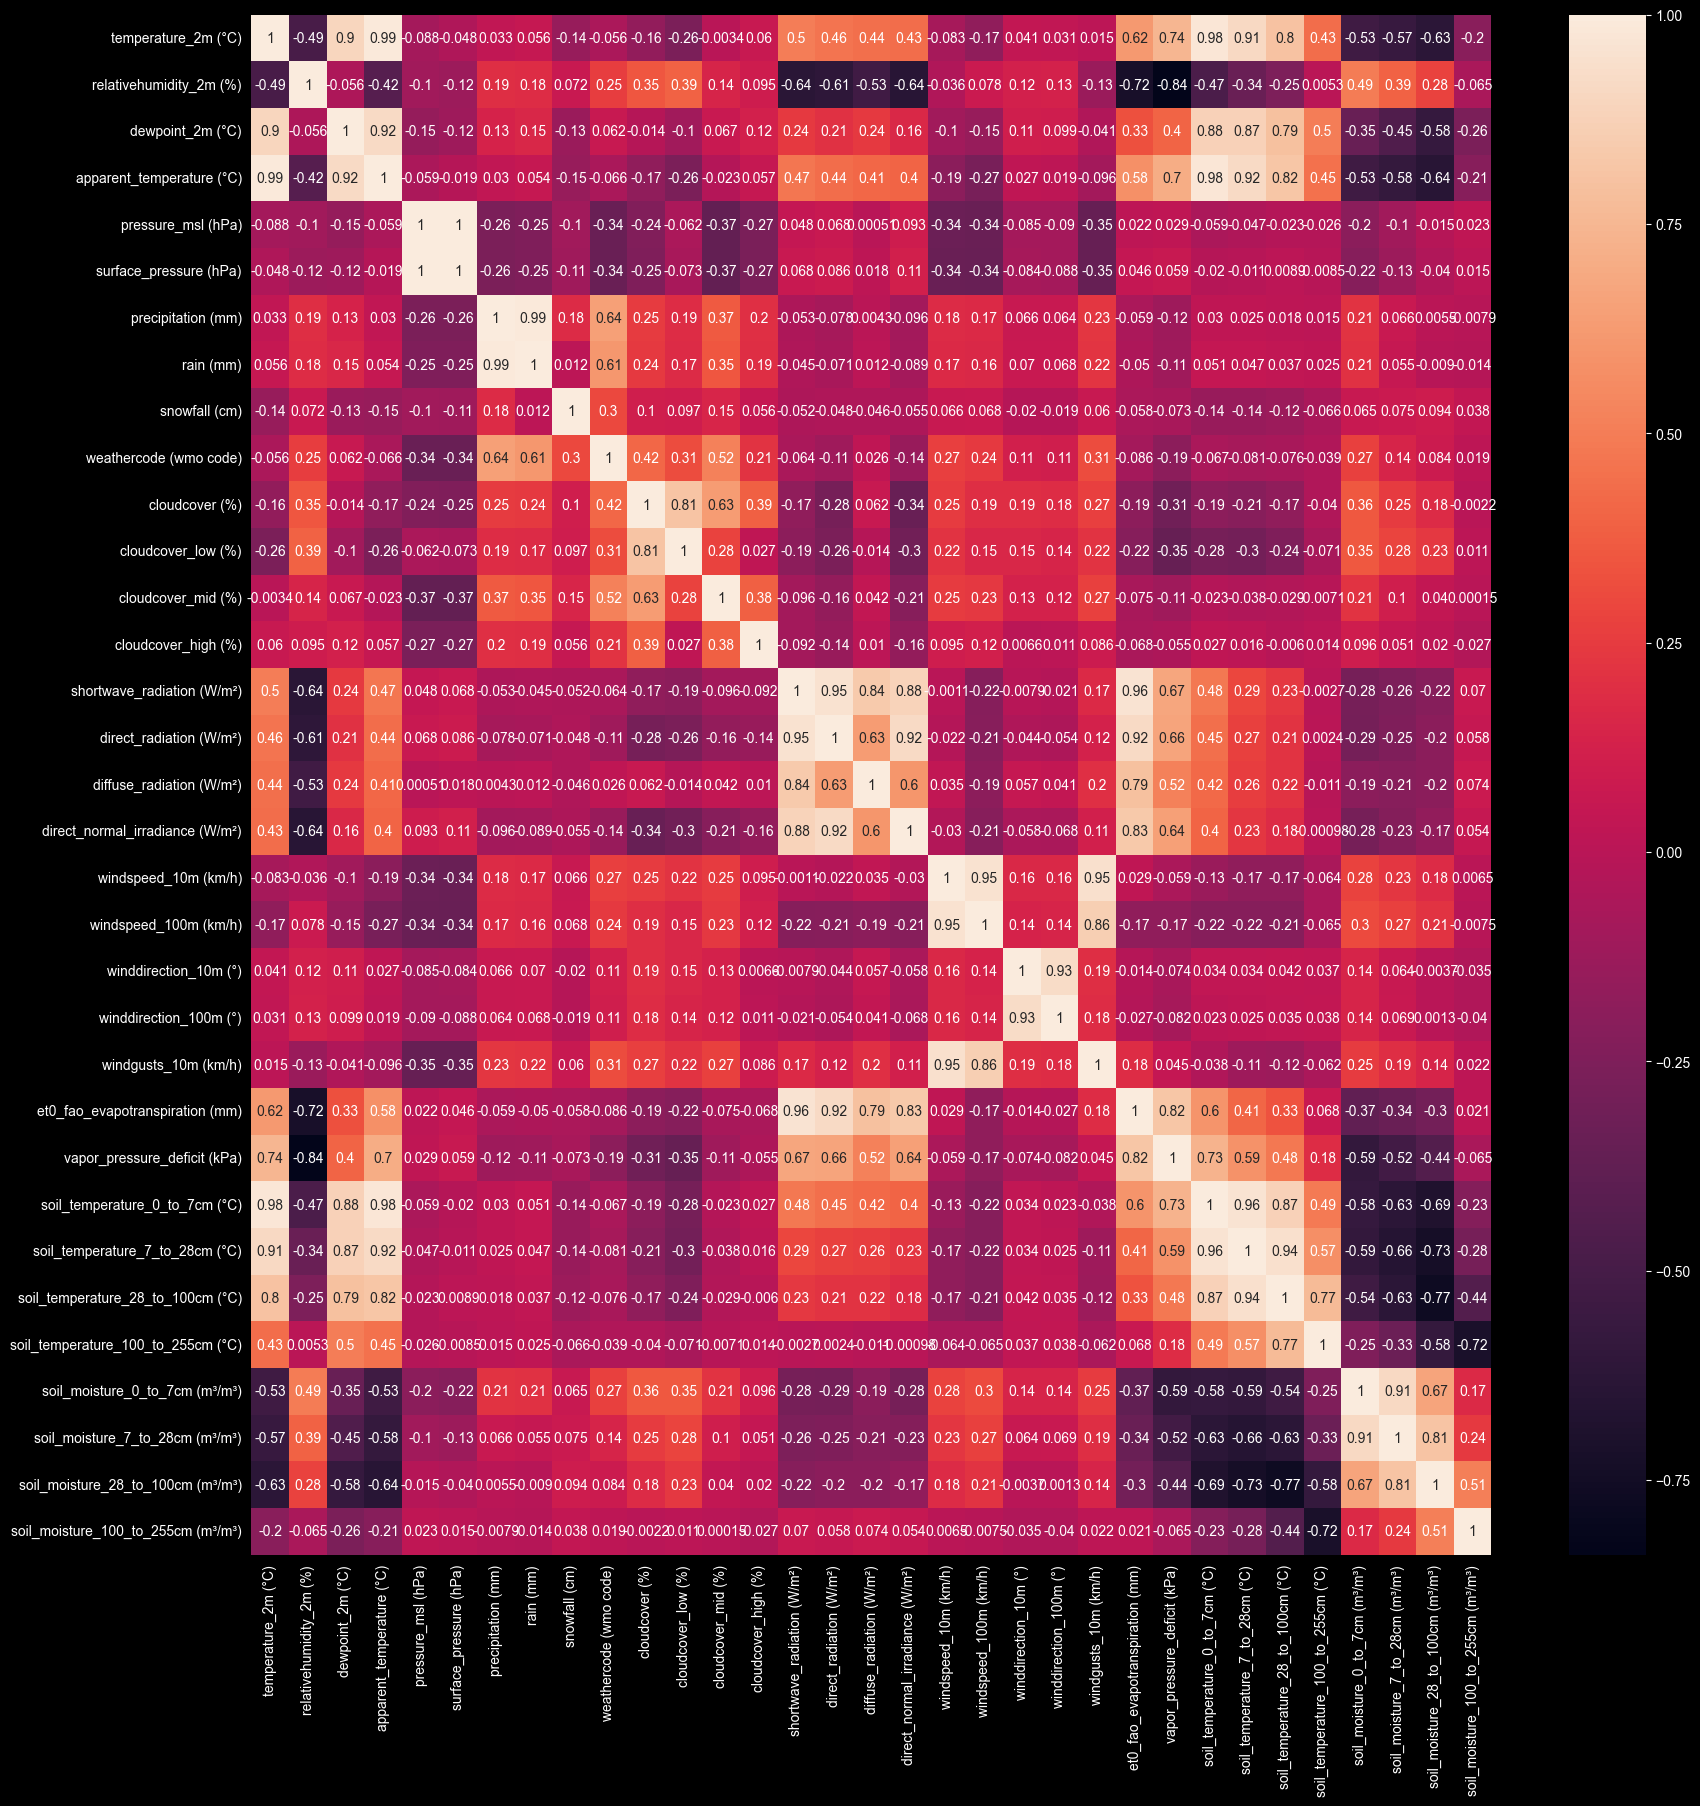

<Axes: >

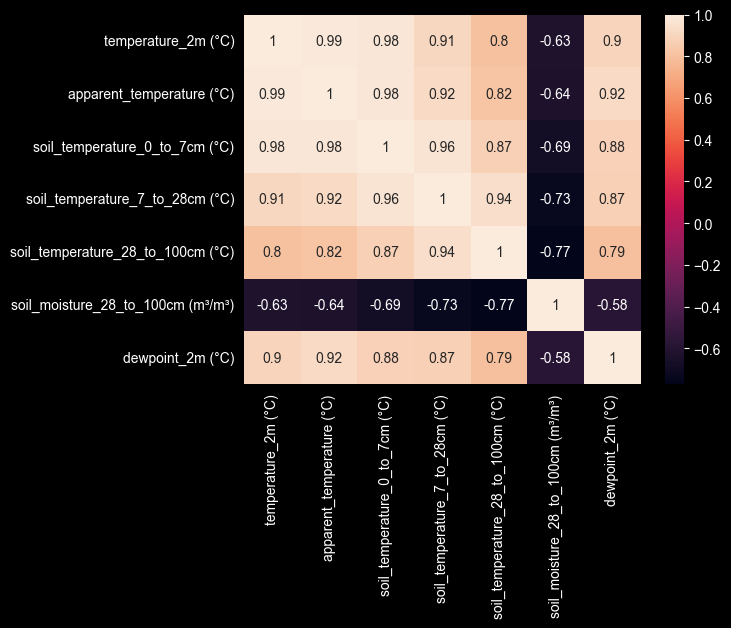

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

# most related values to dewpoint_2m (°C) are: temperature_2m (°C), apparent_temperature (°C), soil_temperature_0_to_7cm (°C), soil_temperature_7_to_28cm (°C), soil_temperature_0_to_7cm (°C)
# but these have a high chance to be redundant so caution
reduced_df = df[['temperature_2m (°C)', 'apparent_temperature (°C)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'soil_moisture_28_to_100cm (m³/m³)', 'dewpoint_2m (°C)']].copy()

sns.heatmap(reduced_df.corr(), annot=True)

## b)
Führen Sie eine Markmalsskalierung mit dem Standardskaler durch. Bauen Sie für die von Ihnen ausgewählten Merkmale ein
passendes Keras-Modell für die Lineare Regression auf und kompilieren und trainieren Sie es mit einem passendem Optimizer und
Verlustfunktion (0.5)

In [6]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
cols = reduced_df.columns.tolist()

X = reduced_df[['temperature_2m (°C)', 'apparent_temperature (°C)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)', 'soil_moisture_28_to_100cm (m³/m³)']].values
# X = reduced_df[['temperature_2m (°C)', 'soil_temperature_0_to_7cm (°C)', 'soil_moisture_28_to_100cm (m³/m³)']].values
X = scaler.fit_transform(X)
y = reduced_df['dewpoint_2m (°C)'].values

# no trainsplit when using timedata (no random order)
n = len(X)
train_size = int(n * 0.8)

X_train = X[:train_size]
X_test  = X[train_size:]
y_train = y[:train_size]
y_test  = y[train_size:]

print("Train X:", X_train.shape,"; y:", y_train.shape)
print("Test X:", X_test.shape,"; y:", y_test.shape)

Train X: (191656, 6) ; y: (191656,)
Test X: (47914, 6) ; y: (47914,)


In [7]:
model = Sequential()
model.add(Dense(units=1, input_shape=(X_train.shape[1],))) # lineare Regression
print(model.summary())

C:\Users\aaron\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

None


## c)
Lernen Sie das Model an, testen Sie passende Anzahlen für die „epochs“ und die „batch_size“. (0.5)

In [21]:
# mse: quadratischer fehler
model.compile(loss='mse', optimizer='sgd')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=16, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

weights = model.get_layer(index=0).get_weights()
loss = model.evaluate(X_test, y_test)
print("weights:", weights, "\nloss:", loss)

Epoch 1/16
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 725us/step - loss: 3.9316 - val_loss: 4.7730
Epoch 2/16
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 691us/step - loss: 3.9302 - val_loss: 4.7950
Epoch 3/16
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 703us/step - loss: 3.9312 - val_loss: 5.0021
Epoch 4/16
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 683us/step - loss: 3.9321 - val_loss: 4.8979
Epoch 5/16
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 720us/step - loss: 3.9312 - val_loss: 4.8198
Epoch 6/16
5990/5990 ━━━━━━━━━━━━━━━━━━━━ 4s 672us/step - loss: 3.9311 - val_loss: 4.8103
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - loss: 4.7730
weights: [array([[ 1.7186682],
       [ 8.802429 ],
       [-9.62805  ],
       [ 4.7099533],
       [ 0.7075104],
       [ 0.5201151]], dtype=float32), array([6.29286], dtype=float32)] 
loss: 4.772968292236328


## d)
Berechnen Sie für Ihr Modell R-Quadrat . (0.5)

In [9]:
from sklearn.metrics import r2_score

# r2: accounted for varianz (1-mse/Var)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Training Data: r2 = {:.3f}" .format(r2_train))
print("Testing Data: r2 = {:.3f}" .format(r2_test))
# Overfitting possible, but severely limited by the size of the Modell

5990/5990 ━━━━━━━━━━━━━━━━━━━━ 2s 378us/step
1498/1498 ━━━━━━━━━━━━━━━━━━━━ 1s 384us/step
Training Data: r2 = 0.900
Testing Data: r2 = 0.865


## e)
Untersuchen Sie die Lernkurven, zeichnen sie sie und zeigen Sie die Lernkurve für Ihr bestes erzieltes Ergebnis! (0.5)

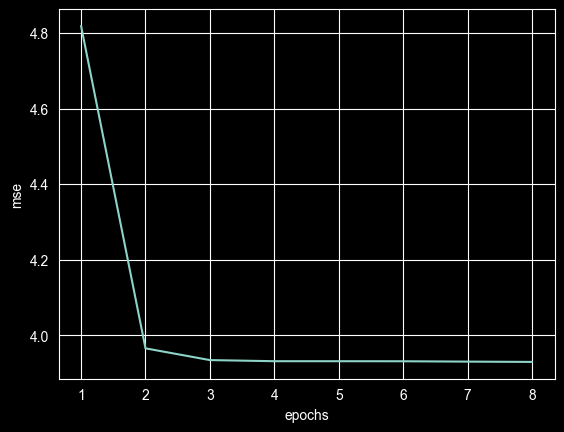

In [12]:
loss_mse = history.history['loss']
plt.xticks(range(1, len(loss_mse)+1))
plt.ylabel('mse')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)

## f)
Nun sollen Sie testen, wie gut der Schneefall in Herford (snowfall (cm)) mithilfe einer linearen Regression aus dem Datensatz
geschätzt werden kann. Führen Sie dazu die Schritte a - e noch einmal durch. Erklären Sie Ihr Ergebnis. (1)

In [ ]:
# prediction: The relations between the attributes present is minimal to snowfall (cm)

reduced_df = df.copy()

scaler = StandardScaler()

X = reduced_df[[
    'temperature_2m (°C)',
    'dewpoint_2m (°C)',
    'precipitation (mm)',
    'rain (mm)',
    'cloudcover_mid (%)',
    'pressure_msl (hPa)',
    'windspeed_10m (km/h)',
    'weathercode (wmo code)'
]]
X = scaler.fit_transform(X)
y = reduced_df['snowfall (cm)'].values

# no trainsplit when using timedata (no random order)
n = len(X)
train_size = int(n * 0.8)

X_train = X[:train_size]
X_test  = X[train_size:]
y_train = y[:train_size]
y_test  = y[train_size:]

print("Train X:", X_train.shape,"; y:", y_train.shape)
print("Test X:", X_test.shape,"; y:", y_test.shape)

In [ ]:
model = Sequential()
model.add(Dense(units=1, input_shape=(X_train.shape[1],)))
print(model.summary())

In [ ]:
model.compile(loss='mse', optimizer='sgd')
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=16, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[early_stop])

weights = model.get_layer(index=0).get_weights()
loss = model.evaluate(X_test, y_test)
print("weights:", weights, "\nloss:", loss)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Training Data: r2 = {:.3f}" .format(r2_train))
print("Testing Data: r2 = {:.3f}" .format(r2_test))

In [ ]:
loss_mse = history.history['loss']
val_loss_mse = history.history['val_loss']
plt.xticks(range(1, len(loss_mse)+1))
plt.ylabel('mse')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)
plt.plot(range(1, len(val_loss_mse)+1), val_loss_mse)